<a href="https://colab.research.google.com/github/OBB-2199/EscapeEarth/blob/main/Interns/Olivia/Activity_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import pandas as pd
!pip install lightkurve
import lightkurve as lk

     |████████████████████████████████| 522kB 5.4MB/s 
     |████████████████████████████████| 256kB 41.9MB/s 
     |████████████████████████████████| 6.5MB 32.4MB/s 
     |████████████████████████████████| 25.9MB 63.0MB/s 
     |████████████████████████████████| 51kB 5.8MB/s 
     |████████████████████████████████| 2.6MB 42.0MB/s 
  Created wheel for fbpca: filename=fbpca-1.0-cp36-none-any.whl size=11376 sha256=8570a0b126f2f7e46c168b0034568e63fdab66389f07b193a71f74f2abc4641a
  Stored in directory: /root/.cache/pip/wheels/53/a2/dd/9b66cf53dbc58cec1e613d216689e5fa946d3e7805c30f60dc
  Created wheel for astroquery: filename=astroquery-0.4.1-cp36-none-any.whl size=3831873 sha256=3cde9a30e518cc9bcf49bfbed134eb66280108b949f7a95ff87391da70ce5c67
  Stored in directory: /root/.cache/pip/wheels/88/f8/b7/a254cd96e808f708bc0b7d755a8e095c56fbbe94099d7b464f
  Created wheel for oktopus: filename=oktopus-0.1.2-cp36-none-any.whl size=12781 sha256=b6b4f0599c9c3cb2bce61f1ac28fa66a320314e75933f86dc81e4da0

In [5]:
import glob
import os
import pandas as pd

def locate_files(tic,path=None):
    '''
    ~ Locates TESS lightcurve files with filenames formatted from a mast bulk download.~
    REQUIRES: glob
    Args: 
        tic            -(int or str)TESS TIC ID
        path           -(str) path on computer to file(s) location
    Returns:
        list of path strings for all files found with specified tic
    '''
    if path == None: #if only need filename
        fullpath = glob.glob('*{}-*-s_lc.fits'.format(tic)) #to use wildcard*
    else: #user defined path to datafile on their computer
        pathstart = path   
        pathstart = str(pathstart) #make a string in case user forgets to but think that gives an err anyway
        pathend = pathstart +'*{}-*-s_lc.fits'.format(tic) #stitches path & filename
        fullpath= glob.glob(pathend) #to use wildcard* 
    return fullpath


def open_rawdata(fullpath,sector):
    '''
    ~ Opens raw data light curve file objects downloaded to our shared google drive folder~
    REQUIRES: lightkurve as lk
    Args:
        fullpath   -(str) list of path strings for all files found with specified tic
        sector    -(int) sector number for desired data
    Returns:
        lcfs      -(list) list of lightkurve 'lightcurvefile' class objects
    '''
    lcfs = []
    for file in fullpath:
        if len(file)==0:
            print('no files')
        else:
            try:
                lcfile = lk.open(file)
                mystring = str(type(lcfile))
                if mystring[34:-2] == 'TessLightCurveFile':
                    hdr = lcfile.get_header()
                    mysector = hdr['SECTOR']
                    if sector == mysector:
                        lcfs.append(lcfile)
                    else:
                        pass
                else:
                    pass
            except FileNotFoundError:
                pass
    return lcfs

In [25]:
# tic ids for subsample
subsample_tics = [7582594, 7582633, 7620704, 7618785, 7584049]
# path to raw data
raw_data_path = '/content/gdrive/MyDrive/EscapeEarthData/Sector_14_rawdata/'

# open data
paths2files = locate_files(subsample_tics[3],raw_data_path) #locate filename given tic id 
subsample_data = open_rawdata(paths2files,sector=14) #open the lightcurvefile
print('Initial function output data type:',type(subsample_data))

Initial function output data type: <class 'list'>


Initial data type: <class 'lightkurve.lightcurvefile.TessLightCurveFile'>


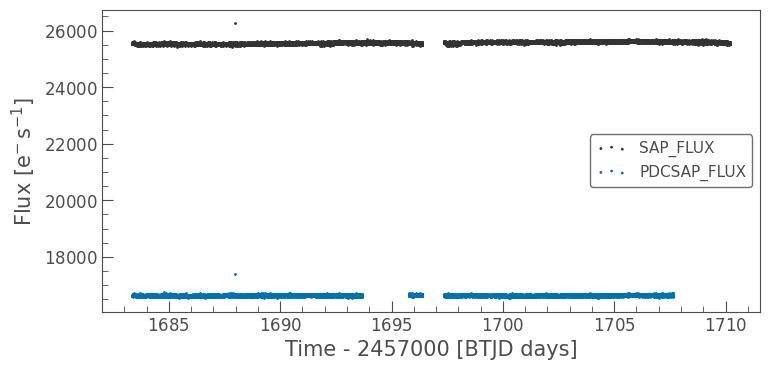

In [7]:
# examine input data

print('Initial data type:',type(subsample_data[0])) #check inital class object type to see allowed methods
subsample_data[0].scatter() #visualize original data

In [30]:
# change/select data type to necessary class object in order to use class method

pdcsap_data = subsample_data[0].PDCSAP_FLUX #change class object type
print('original data type:',type(subsample_data[0])) #print to see change in class object type
print('new data type:',type(pdcsap_data)) #verify class object change

original data type: <class 'lightkurve.lightcurvefile.TessLightCurveFile'>
new data type: <class 'lightkurve.lightcurve.TessLightCurve'>


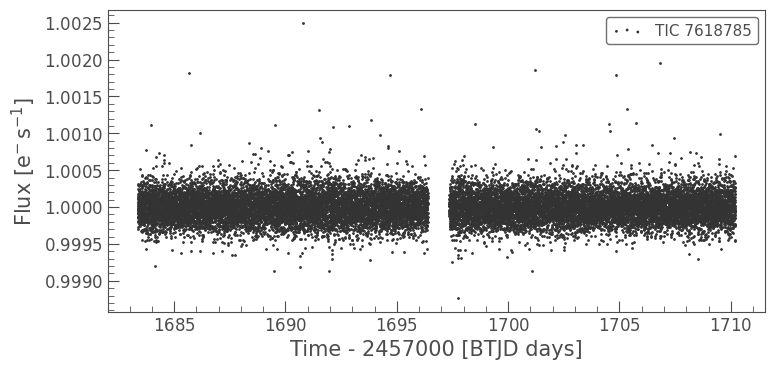

In [31]:
#flatten test
pdcsap_flat = pdcsap_data.flatten()
pdcsap_flat.scatter()

In [26]:
print(subsample_data)

[TessLightCurveFile(TICID: 7618785)]


flatten(self, window_length=101, polyorder=2, return_trend=False, break_tolerance=5, niters=3, sigma=3, mask=None, **kwargs)¶


class object change: <class 'lightkurve.lightcurvefile.TessLightCurveFile'> changed to <class 'lightkurve.lightcurve.TessLightCurve'>
class object change: <class 'lightkurve.lightcurvefile.TessLightCurveFile'> changed to <class 'lightkurve.lightcurve.TessLightCurve'>
class object change: <class 'lightkurve.lightcurvefile.TessLightCurveFile'> changed to <class 'lightkurve.lightcurve.TessLightCurve'>


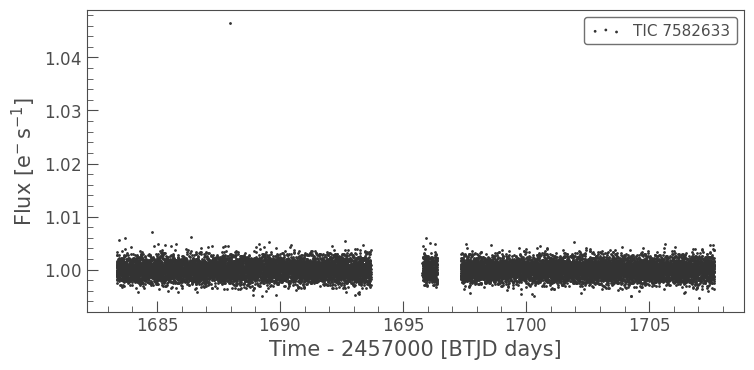

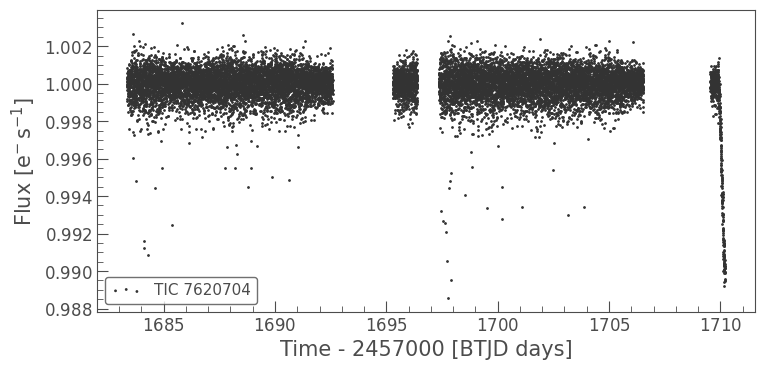

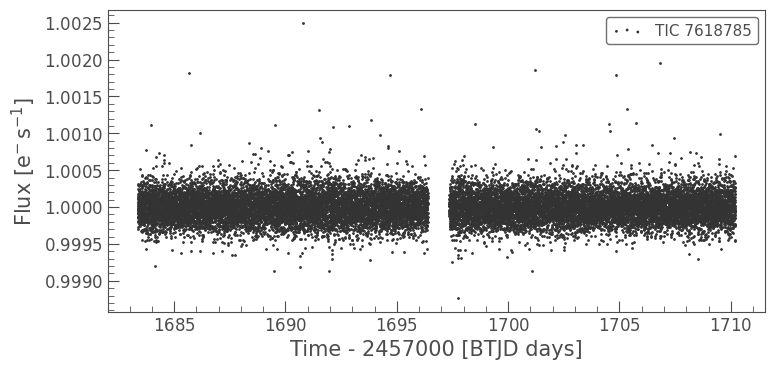

In [40]:
for target in subsample_tics:
  #open data
  paths = locate_files(target,raw_data_path)
  original_data = open_rawdata(paths,sector=14)

  #saveguard against missing files
  if len(original_data)==0: #if no files exist go to next target in for loop
    pass
  else: #if files exist proceed

    #format data (class object type)
    new_data = original_data[0].PDCSAP_FLUX #index into orignal_data b/c its a list
    #verify class object change
    print('class object change:',type(original_data[0]),'changed to',type(new_data))

    #apply method
    cleaned_data = new_data.flatten()
    #verify cleaned data looks different (or save it)
    cleaned_data.scatter()